<a href="https://colab.research.google.com/github/robertbarac/Predicting_Hours_Of_Work_Absenteeism/blob/main/1_Ausentismo_en_el_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ausentismo en el Trabajo. EDA e Implementación de Modelos ML y DL.

## Importación de librerías

In [1]:
import zipfile
!pip install wget
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=78ae8b1483709cfdc310d4a7fc0d284d8778a9777f06fb9faf7e1e4800549302
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Lectura de la data

In [2]:
ruta_zip = "https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip"
ruta_extraccion = "https://archive.ics.uci.edu/ml/machine-learning-databases/00445/"
"""password = None
archivo_zip = zipfile.ZipFile(ruta_zip, "r")
try:
    print(archivo_zip.namelist())
    archivo_zip.extractall(pwd=password, path=ruta_extraccion)
except:
    pass
archivo_zip.close()"""

'password = None\narchivo_zip = zipfile.ZipFile(ruta_zip, "r")\ntry:\n    print(archivo_zip.namelist())\n    archivo_zip.extractall(pwd=password, path=ruta_extraccion)\nexcept:\n    pass\narchivo_zip.close()'

In [3]:
a = wget.download(ruta_zip)

In [4]:
a

'Absenteeism_at_work_AAA.zip'

In [5]:
archivo_zip = zipfile.ZipFile("/content/Absenteeism_at_work_AAA.zip", "r")

In [6]:
archivo_zip.namelist()

['Absenteeism_at_work.arff',
 'Absenteeism_at_work.csv',
 'Absenteeism_at_work.xls',
 'Attribute Information.docx',
 'UCI_ABS_TEXT.docx']

In [7]:
archivo_zip.extractall("/content/")

In [8]:
ausentismo = pd.read_csv("/content/Absenteeism_at_work.csv", delimiter=";")

In [9]:
ausentismo.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [10]:
ausentismo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [11]:
ausentismo.shape

(740, 21)

## EDA & Visualization

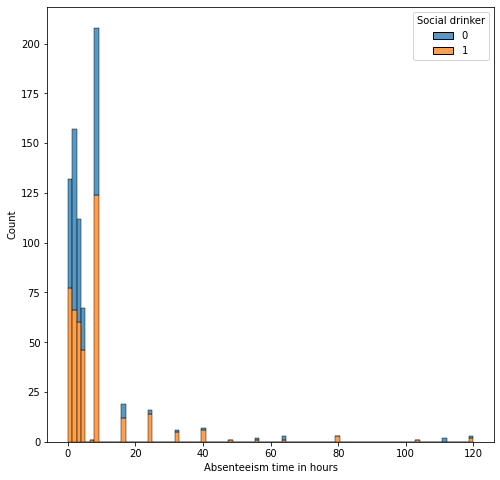

In [12]:
fig = plt.figure(figsize = (8,8))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Social drinker', multiple='stack')
plt.show()

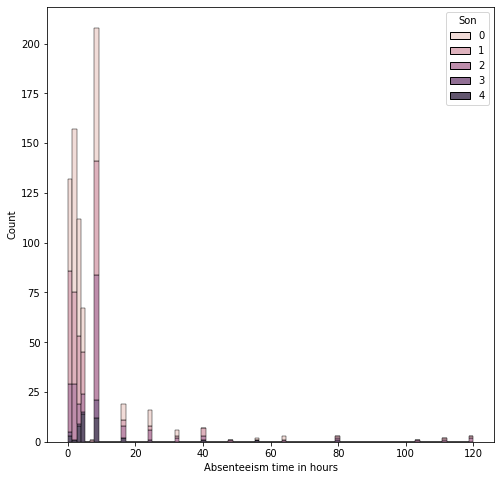

In [13]:
fig = plt.figure(figsize = (8,8))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Son', multiple='stack', cumulative=False, stat='count')
plt.show()

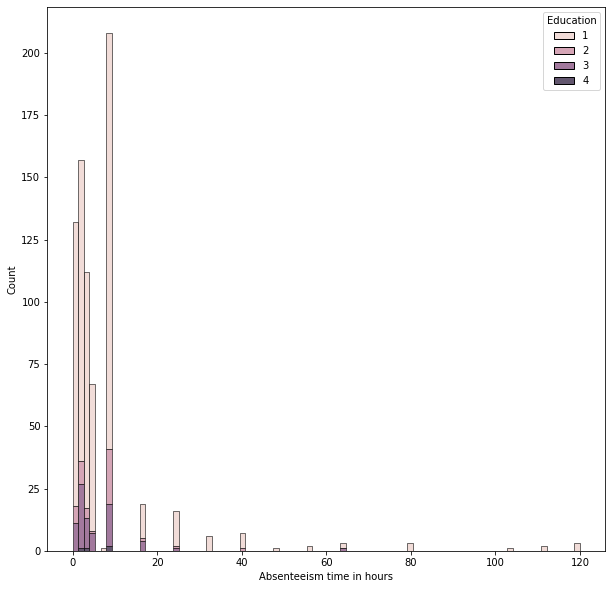

In [14]:
fig = plt.figure(figsize = (10,10))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Education', multiple='stack', cumulative=False, stat='count')
plt.show()

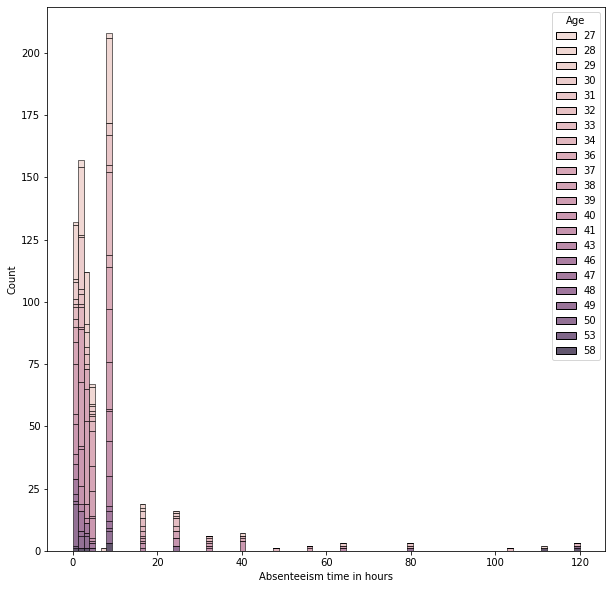

In [15]:
fig = plt.figure(figsize = (10,10))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Age', cumulative=False, stat='count', multiple='stack')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


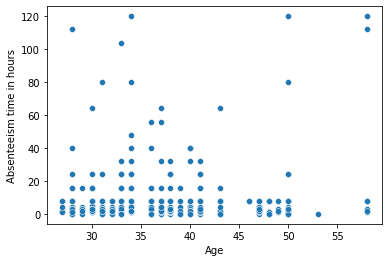

In [16]:
sns.scatterplot(ausentismo['Age'], ausentismo['Absenteeism time in hours'])

6.924324324324324 3.0


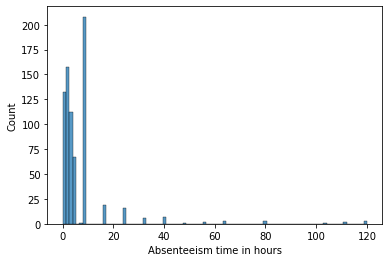

In [17]:
sns.histplot(ausentismo, x = 'Absenteeism time in hours')
print(ausentismo['Absenteeism time in hours'].mean(), ausentismo['Absenteeism time in hours'].median())

**¿Qué días faltan al trabajo?**

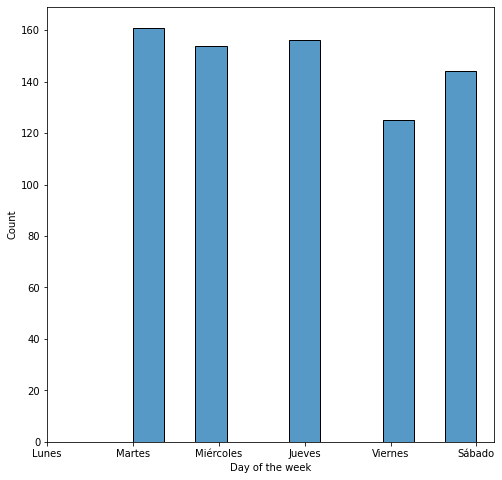

In [23]:
fig = plt.figure(figsize=(8,8))
sns.histplot(ausentismo, x = 'Day of the week')
plt.xticks([1,2,3,4,5,6], ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"])
plt.show()

Se nota que es muy parejo el ausentismo

In [24]:
ausentismo['Day of the week'].unique()

array([3, 4, 5, 6, 2])

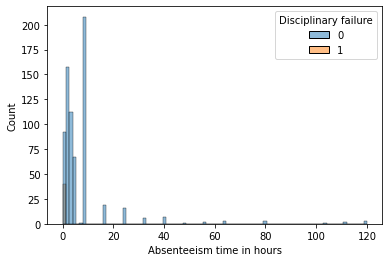

In [25]:
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Disciplinary failure')

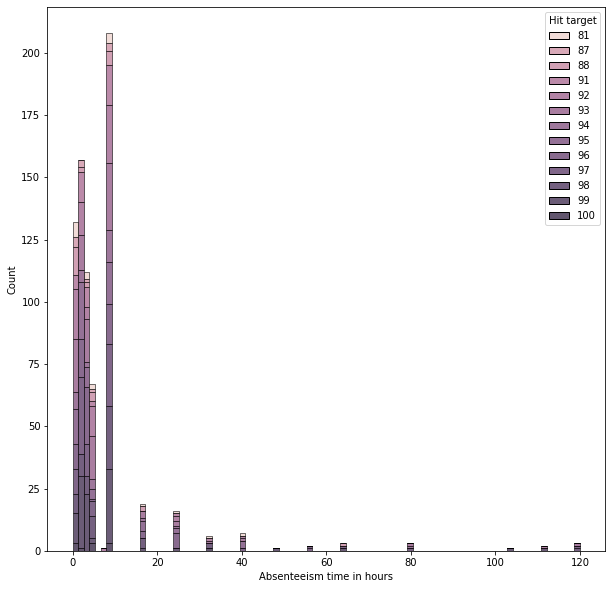

In [26]:
fig = plt.figure(figsize = (10,10))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Hit target', multiple='stack')
plt.show()

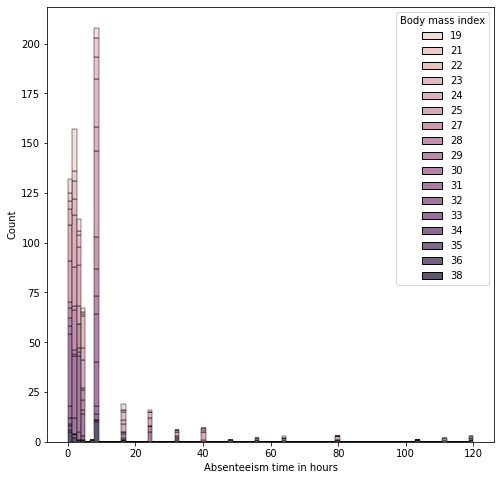

In [27]:
fig = plt.figure(figsize = (8,8))
sns.histplot(ausentismo, x = 'Absenteeism time in hours', hue = 'Body mass index', multiple='stack')
plt.show()

## Modelo con Sklearn

Importamos librerías...

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
ausentismo.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [32]:
X = ausentismo[['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']].values
y = ausentismo['Absenteeism time in hours'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3)

slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
slr.predict(x_test)

In [35]:
slr.score(x_test, y_test)

0.08854245805382599

## Modelo con Tensorflow

In [63]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1, L1L2, L2

In [118]:
model2 = Sequential([
    Dense(64, activation='relu',input_shape=(20,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

In [119]:
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [121]:
model2.fit(x_train, y_train, epochs = 300)

Epoch 1/300
17/17 [==============================] - 0s 6ms/step - loss: 0.6418 - mae: 0.3553
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6060 - mae: 0.3490
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6446 - mae: 0.3626
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.6548 - mae: 0.3533
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6817 - mae: 0.3537
Epoch 6/300
17/17 [==============================] - 0s 10ms/step - loss: 0.7368 - mae: 0.3631
Epoch 7/300
17/17 [==============================] - 0s 8ms/step - loss: 0.6003 - mae: 0.3325
Epoch 8/300
17/17 [==============================] - 0s 9ms/step - loss: 0.6364 - mae: 0.3423
Epoch 9/300
17/17 [==============================] - 0s 9ms/step - loss: 0.6729 - mae: 0.3413
Epoch 10/300
17/17 [==============================] - 0s 8ms/step - loss: 0.5532 - mae: 0.3560
Epoch 11/300
17/17 [==============================] - 0s 4

In [122]:
model2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 1.0238 - mae: 0.3864


[1.0238313674926758, 0.38640597462654114]